In [1]:
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
import numpy as np

### 数据生成

In [4]:
# Set the random seed for reproducibility
random.seed(42)

# Number of data points
num_data_points = 5000000

# Define the ranges for each parameter
w1_range = (50, 300)
l1_range = (100, 750)
w2_range = (50, 300)
l2_range = (100, 750)
phi_range = (0, 180)
px_range = (180, 900)
py_range = (180, 900)

# Generate random data
data = {
    'W1': [],
    'L1': [],
    'W2': [],
    'L2': [],
    'Phi': [],
    'Px': [],
    'Py': [],
}

# Generate remaining random data
for _ in range(num_data_points):
    data['W1'].append(random.randint(*w1_range))
    data['L1'].append(random.randint(*l1_range))
    data['W2'].append(random.randint(*w2_range))
    data['L2'].append(random.randint(*l2_range))
    data['Phi'].append(random.randint(*phi_range))
    data['Px'].append(random.randint(*px_range))
    data['Py'].append(random.randint(*py_range))

# Create a DataFrame
df = pd.DataFrame(data)



### 数据过滤

In [5]:
def rotate_rect_dimensions(length, width, angle_degrees):
    # 将角度转换为弧度
    angle_radians = np.radians(angle_degrees)

    # 计算旋转后的外切矩形的长和宽
    rotated_length = abs(length * np.cos(angle_radians)) + abs(width * np.sin(angle_radians))
    rotated_width = abs(length * np.sin(angle_radians)) + abs(width * np.cos(angle_radians))

    return rotated_length, rotated_width

def filter_data(df):
    """
    过滤数据的函数。

    参数：
    df (DataFrame): 包含原始数据的DataFrame。

    返回：
    DataFrame: 过滤后的DataFrame。
    """
    # 定义过滤条件
    def condition1(df):
        return df['W1'] + df['W2'] <= df['Px']

    def condition2(df):
        return df[['L1', 'L2']].max(axis=1) <= df['Py']

    def condition3(df):
        # 计算旋转后的矩形尺寸
        df['length'] = df[['L1', 'L2']].max(axis=1)
        df['width'] = (df['W1'] + df['W2'] + df['Px']) / 2
        df['rotated_length'], df['rotated_width'] = zip(*df.apply(lambda row: rotate_rect_dimensions(row['length'], row['width'], row['Phi']), axis=1))

        # 添加过滤条件
        return (df['rotated_length'] <= df['Py']) & (df['rotated_width'] <= df['Px'])

    # 使用逻辑与连接所有过滤条件
    combined_condition = pd.Series(True, index=df.index)
    for condition in [condition1,condition2,condition3]:
        combined_condition = combined_condition & condition(df)

    # 根据过滤条件进行筛选
    filtered_df = df[combined_condition]

    return filtered_df

# 使用函数过滤数据
filtered_df = filter_data(df)

# 打印过滤前后的数据数量
print(f"过滤前的数据数量: {len(df)}")
print(f"过滤后的数据数量: {len(filtered_df)}")



过滤前的数据数量: 5000000
过滤后的数据数量: 687380


In [8]:
filtered_df = filtered_df[['W1', 'L1', 'W2', 'L2', 'Phi', 'Px', 'Py']]

### 先从数据中sample 20万条

In [12]:
### 先从数据中sample 20万条
data_20w = filtered_df.sample(n=200000, random_state=42)
### 除去sample的数据
data_except_20 = filtered_df.drop(data_20w.index)

### 绘图

array([[<Axes: title={'center': 'W1'}>, <Axes: title={'center': 'L1'}>,
        <Axes: title={'center': 'W2'}>],
       [<Axes: title={'center': 'L2'}>, <Axes: title={'center': 'Phi'}>,
        <Axes: title={'center': 'Px'}>],
       [<Axes: title={'center': 'Py'}>, <Axes: >, <Axes: >]], dtype=object)

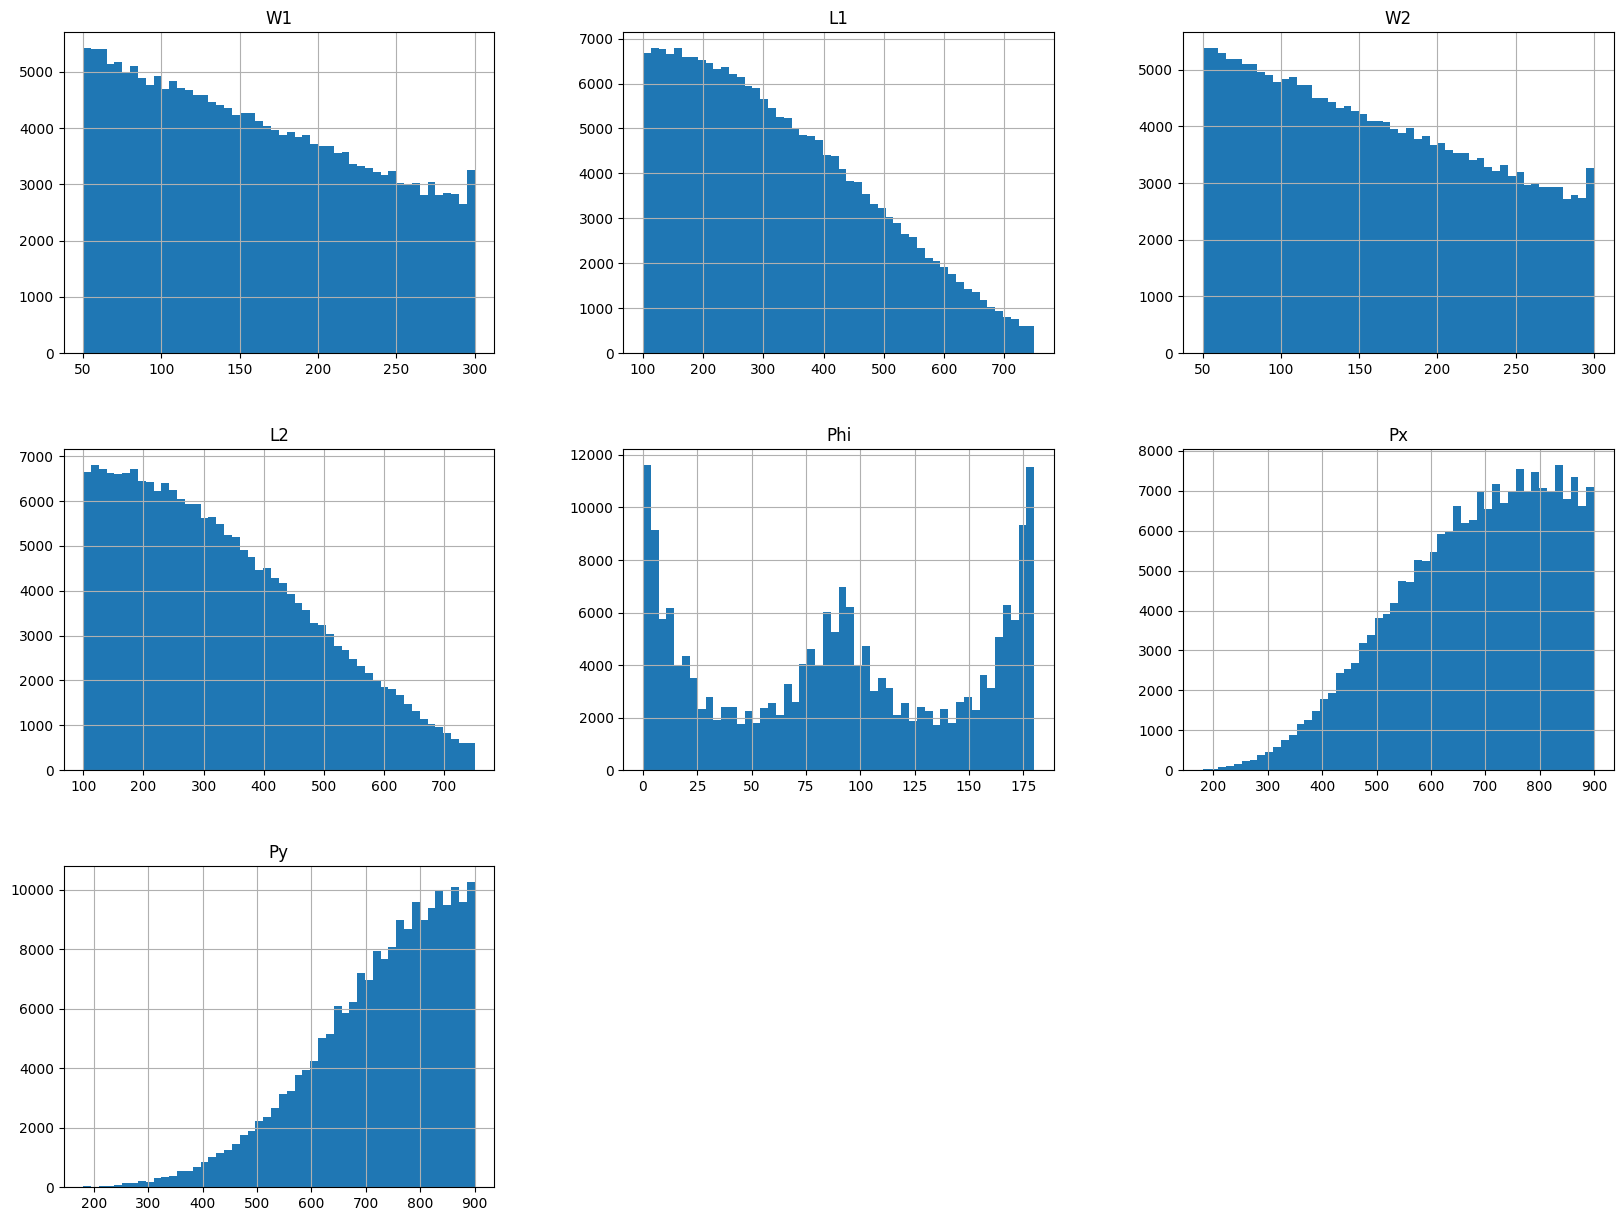

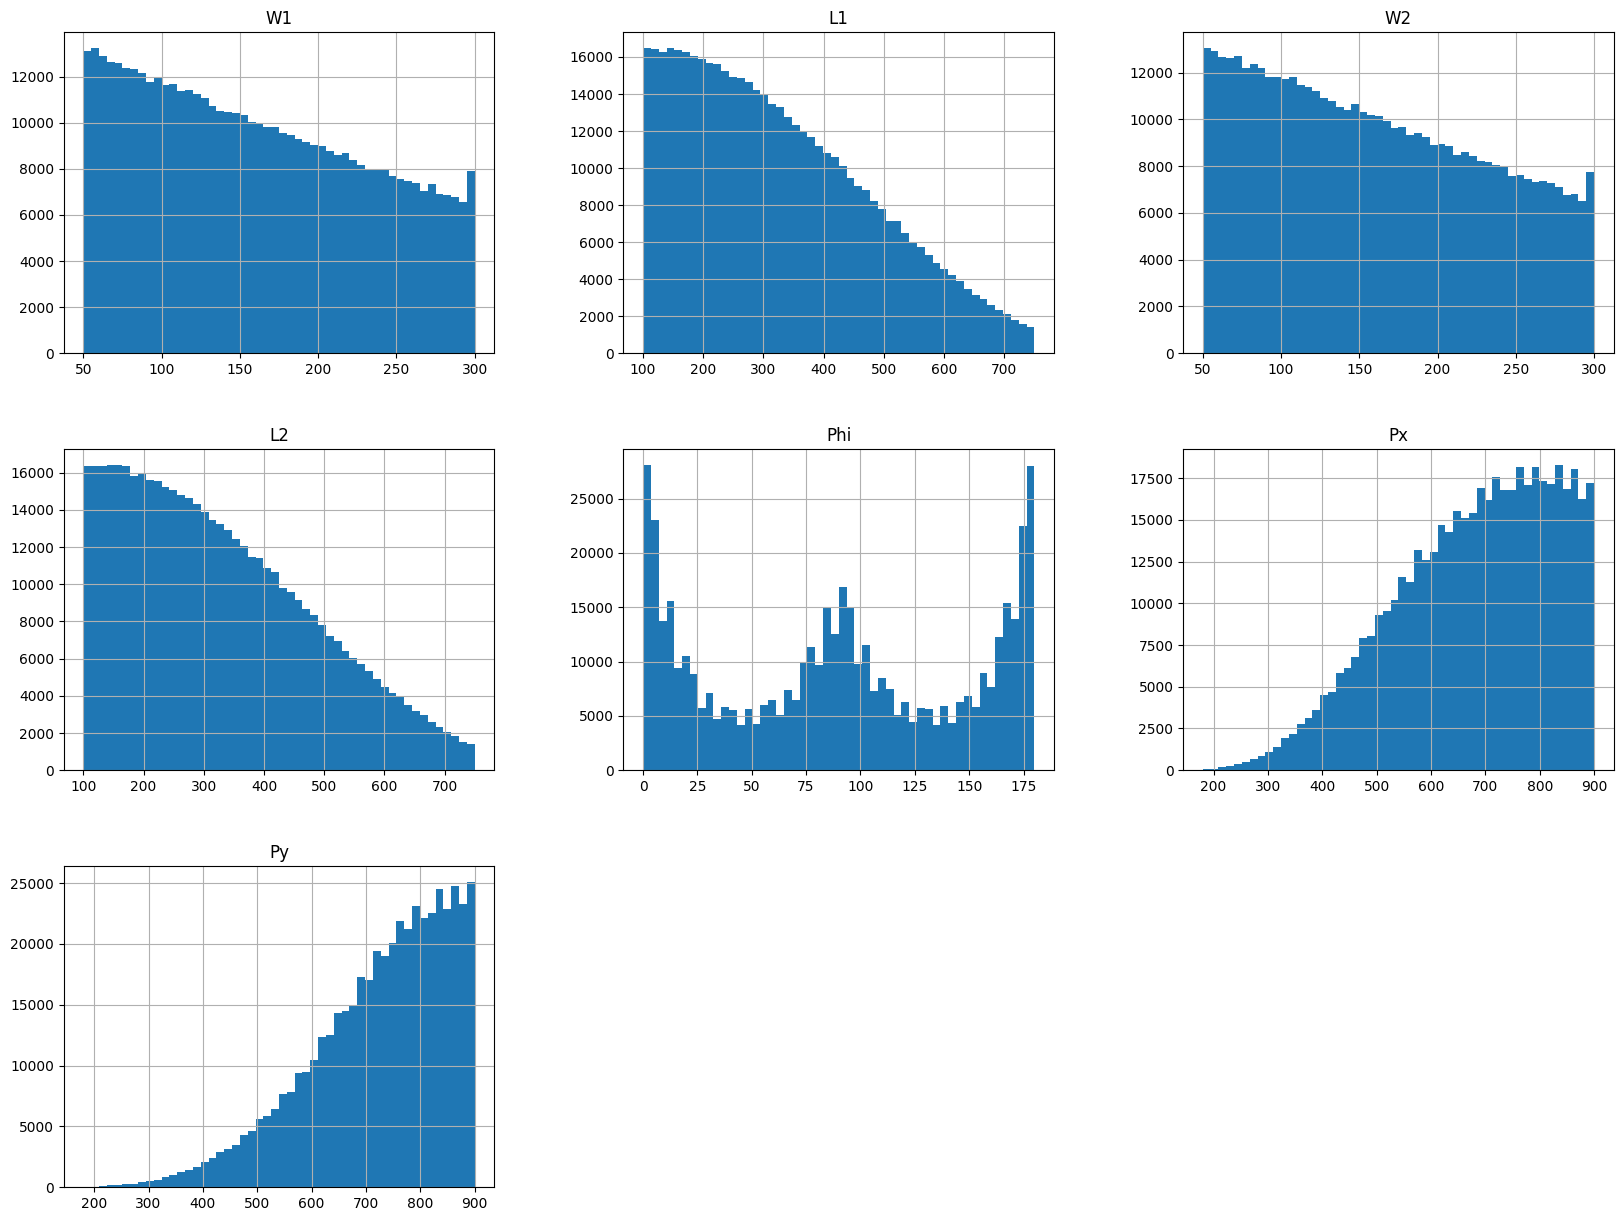

In [14]:
data_20w.hist(bins=50, figsize=(20, 15))
data_except_20.hist(bins=50, figsize=(20, 15))

In [15]:
# 从data_except_20中筛选1万W1在200~300之间的数据对data_20w进行补充
data_except_20_W1 = data_except_20[(data_except_20['W1'] >= 200) & (data_except_20['W1'] <= 300)]
data_except_20_W1 = data_except_20_W1.sample(n=10000, random_state=42)
data_21w = pd.concat([data_20w, data_except_20_W1])
data_except_21 = data_except_20.drop(data_except_20_W1.index)

# 从data_except_21中筛选1万W2在200~300之间的数据对data_21w进行补充
data_except_21_W2 = data_except_21[(data_except_21['W2'] >= 200) & (data_except_21['W2'] <= 300)]
data_except_21_W2 = data_except_21_W2.sample(n=10000, random_state=42)
data_22w = pd.concat([data_21w, data_except_21_W2])
data_except_22 = data_except_21.drop(data_except_21_W2.index)

# 从data_except_22中筛选2万L1在400~700之间的数据对data_22w进行补充
data_except_22_L1 = data_except_22[(data_except_22['L1'] >= 400) & (data_except_22['L1'] <= 700)]
data_except_22_L1 = data_except_22_L1.sample(n=20000, random_state=42)
data_24w = pd.concat([data_22w, data_except_22_L1])
data_except_24 = data_except_22.drop(data_except_22_L1.index)

# 从data_except_24中筛选2万L2在400~700之间的数据对data_24w进行补充
data_except_24_L2 = data_except_24[(data_except_24['L2'] >= 400) & (data_except_24['L2'] <= 700)]
data_except_24_L2 = data_except_24_L2.sample(n=20000, random_state=42)
data_26w = pd.concat([data_24w, data_except_24_L2])
data_except_26 = data_except_24.drop(data_except_24_L2.index)

# 从data_except_26中筛选1万Phi在25~75之间的数据对data_26w进行补充
data_except_26_Phi = data_except_26[(data_except_26['Phi'] >= 25) & (data_except_26['Phi'] <= 75)]
data_except_26_Phi = data_except_26_Phi.sample(n=10000, random_state=42)
data_27w = pd.concat([data_26w, data_except_26_Phi])
data_except_27 = data_except_26.drop(data_except_26_Phi.index)

# 从data_except_27中筛选1万Phi在100~150之间的数据对data_27w进行补充
data_except_27_Phi = data_except_27[(data_except_27['Phi'] >= 100) & (data_except_27['Phi'] <= 150)]
data_except_27_Phi = data_except_27_Phi.sample(n=10000, random_state=42)
data_28w = pd.concat([data_27w, data_except_27_Phi])
data_except_28 = data_except_27.drop(data_except_27_Phi.index)

# 从data_except_28中筛选2万Px在200~500之间的数据对data_28w进行补充
data_except_28_Px = data_except_28[(data_except_28['Px'] >= 200) & (data_except_28['Px'] <= 500)]
data_except_28_Px = data_except_28_Px.sample(n=20000, random_state=42)
data_30w = pd.concat([data_28w, data_except_28_Px])
data_except_30 = data_except_28.drop(data_except_28_Px.index)

# 从data_except_30中筛选2万Py在200~500之间的数据对data_30w进行补充
data_except_30_Py = data_except_30[(data_except_30['Py'] >= 200) & (data_except_30['Py'] <= 500)]
data_except_30_Py = data_except_30_Py.sample(n=20000, random_state=42)
data_32w = pd.concat([data_30w, data_except_30_Py])
data_except_32 = data_except_30.drop(data_except_30_Py.index)



In [19]:
# 从data_except_32中筛选1.5万Phi在25~75之间的数据对data_32w进行补充
data_except_32_Phi = data_except_32[(data_except_32['Phi'] >= 25) & (data_except_32['Phi'] <= 75)]
data_except_32_Phi = data_except_32_Phi.sample(n=15000, random_state=42)
data_33w = pd.concat([data_32w, data_except_32_Phi])
data_except_33 = data_except_32.drop(data_except_32_Phi.index)

# 从data_except_33中筛选1.5万Phi在100~150之间的数据对data_33w进行补充
data_except_33_Phi = data_except_33[(data_except_33['Phi'] >= 100) & (data_except_33['Phi'] <= 150)]
data_except_33_Phi = data_except_33_Phi.sample(n=15000, random_state=42)
data_35w = pd.concat([data_33w, data_except_33_Phi])
data_except_35 = data_except_33.drop(data_except_33_Phi.index)

array([[<Axes: title={'center': 'W1'}>, <Axes: title={'center': 'L1'}>,
        <Axes: title={'center': 'W2'}>],
       [<Axes: title={'center': 'L2'}>, <Axes: title={'center': 'Phi'}>,
        <Axes: title={'center': 'Px'}>],
       [<Axes: title={'center': 'Py'}>, <Axes: >, <Axes: >]], dtype=object)

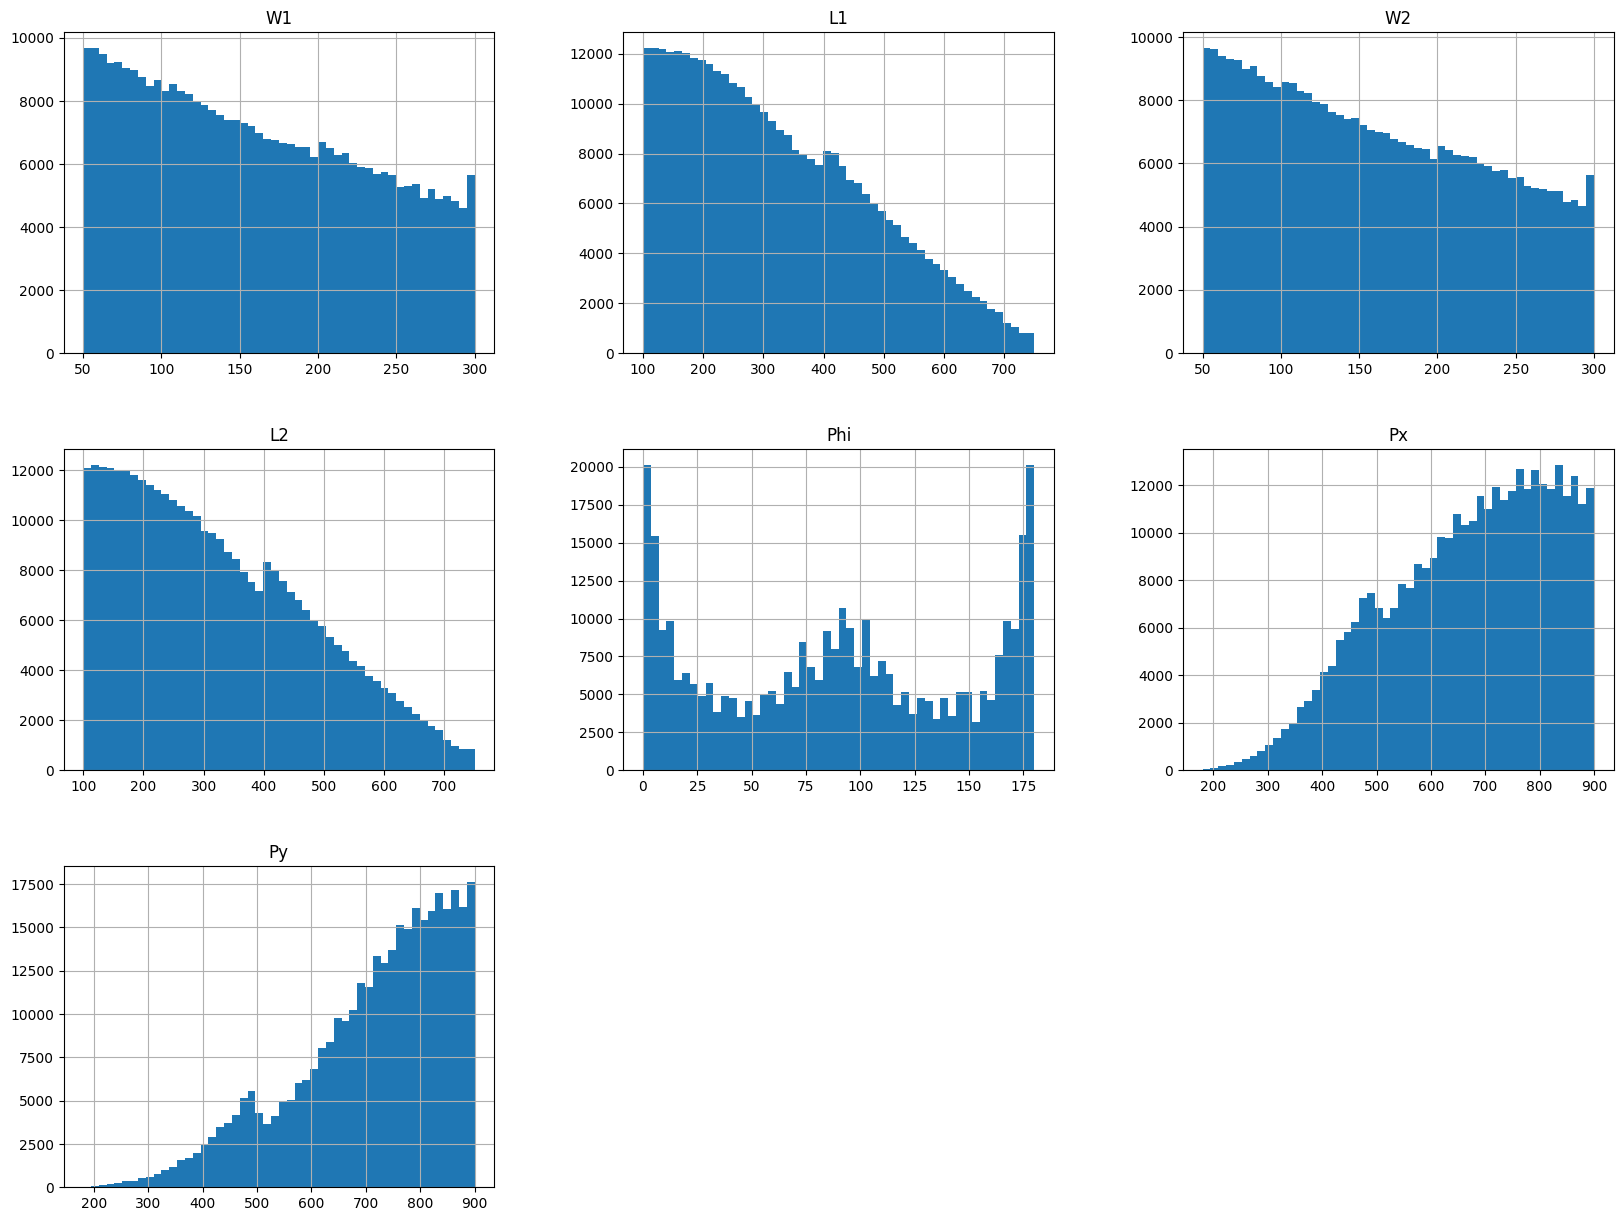

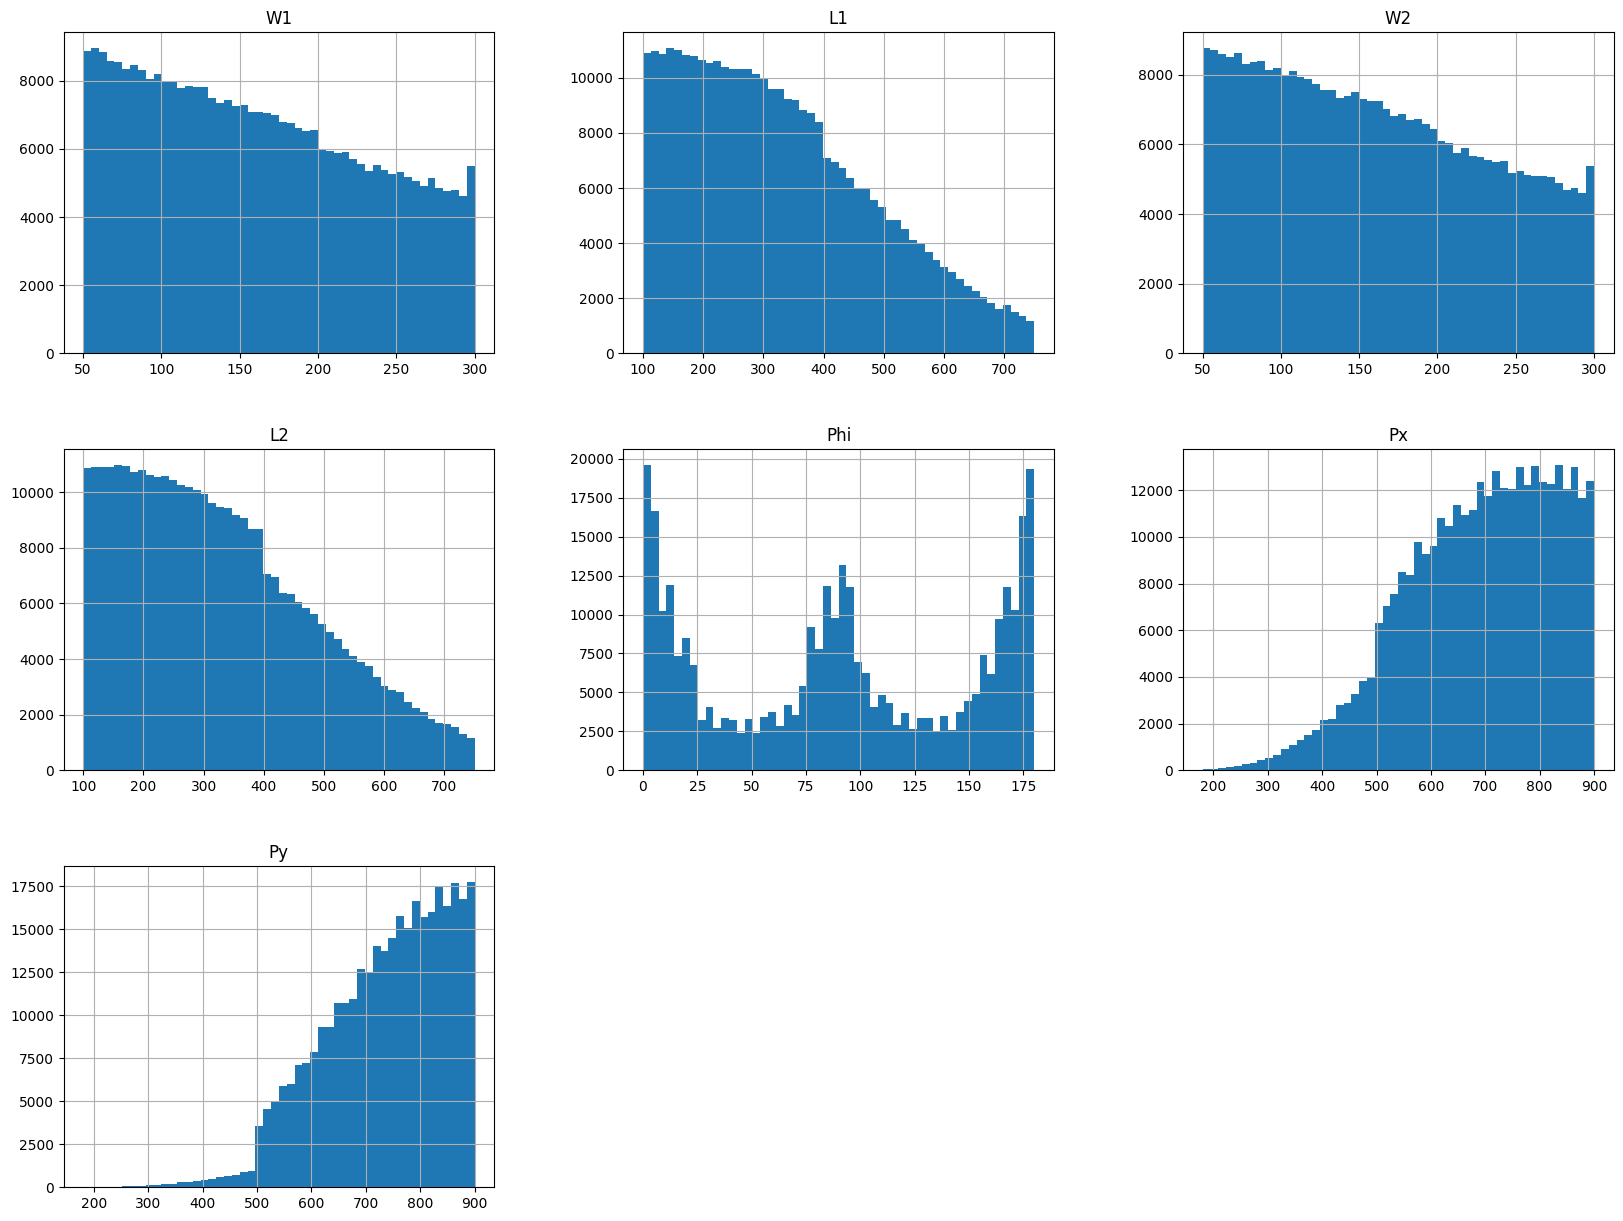

In [21]:
data_35w.hist(bins=50, figsize=(20, 15))
data_except_35.hist(bins=50, figsize=(20, 15))

In [ ]:
data_35w.insert(0, 'Pic', None)
data_35w.insert(0, 'type', "double_rec")

In [ ]:
from tqdm import tqdm
for i in tqdm(range(len(data_35w))):
    W1 = data_35w.iloc[i]['W1']
    L1 = data_35w.iloc[i]['L1']
    W2 = data_35w.iloc[i]['W2']
    L2 = data_35w.iloc[i]['L2']
    Px = data_35w.iloc[i]['Px']
    Py = data_35w.iloc[i]['Py']
    phi = data_35w.iloc[i]['Phi']
    #W1=50=L1=106=W2=190=L2=662=phi=0=Px=370=Py=680.png
    pic_name = f'W1={W1}=L1={L1}=W2={W2}=L2={L2}=phi={phi}=Px={Px}=Py={Py}.png'
    data_35w.loc[i,"Pic"] = pic_name

In [22]:
data_35w.to_csv('double_rec_35w.csv', index=False)

### 进行绘图

In [2]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import os
import pandas as pd
import numpy as np
import matplotlib.transforms as transforms
# import cv2
import math
from tqdm import tqdm


In [3]:
data = pd.read_csv('double_rec_35w.csv')

In [4]:
def double_rectangle_draw(save_name, W1, L1, W2, L2, a, Px, Py,phi, dir):
    fig, ax = plt.subplots(figsize=(1, 1))
    ax.set_xlim(-450, 450)
    ax.set_ylim(-450, 450)

    # 绘制白色背景
    ax.set_facecolor('white')

    # 绘制黄色矩形
    rect_center = (0, 0)  # 矩形中心点坐标
    rect_width = Px  # 矩形长度
    rect_height = Py  # 矩形宽度
    rect = patches.Rectangle((rect_center[0] - rect_width / 2, rect_center[1] - rect_height / 2),
                             rect_width, rect_height, linewidth=1, edgecolor='yellow', facecolor='yellow')
    ax.add_patch(rect)

    # 绘制红色矩形1
    rect_center = (Px/4, 0)  # 矩形中心点坐标
    rect_width = W2  # 矩形宽度
    rect_height = L2  # 矩形长度
    angle = a  # 旋转角度
    rect_1 = patches.Rectangle((rect_center[0] - rect_width / 2, rect_center[1] - rect_height / 2),
                               rect_width, rect_height, angle=angle, linewidth=1, edgecolor='red', facecolor='red')

    # 绘制红色矩形2
    rect_center = (-Px/4, 0)  # 矩形中心点坐标
    rect_width = W1  # 矩形宽度
    rect_height = L1  # 矩形长度
    angle = a  # 旋转角度
    rect_2 = patches.Rectangle((rect_center[0] - rect_width / 2, rect_center[1] - rect_height / 2),
                               rect_width, rect_height, angle=angle, linewidth=1, edgecolor='red', facecolor='red')

    # 将两个红色矩形作为一个整体，围绕画布中心进行旋转
    trans = patches.Affine2D().rotate_deg(phi) + ax.transData
    rect_1.set_transform(trans)
    rect_2.set_transform(trans)

    ax.add_patch(rect_1)
    ax.add_patch(rect_2)

    # 显示图像
    plt.gca().set_aspect('equal', adjustable='box')
    plt.axis('off')  # 关闭坐标轴
    plt.subplots_adjust(top=1, bottom=0, right=1, left=0, hspace=0, wspace=0)
    plt.margins(0, 0)
    plt.savefig(os.path.join(dir, save_name + '.png'))
    # plt.show()
    plt.clf ()
    plt.close()


In [5]:
data

,type,Pic,W1,L1,W2,L2,Phi,Px,Py
0,double_rec,W1=290=L1=269=W2=104=L2=409=phi=72=Px=540=Py=6...,290,269,104,409,72,540,670
1,double_rec,W1=300=L1=330=W2=177=L2=189=phi=106=Px=491=Py=...,300,330,177,189,106,491,872
2,double_rec,W1=126=L1=283=W2=172=L2=298=phi=55=Px=726=Py=8...,126,283,172,298,55,726,890
3,double_rec,W1=230=L1=422=W2=103=L2=348=phi=14=Px=839=Py=6...,230,422,103,348,14,839,612
4,double_rec,W1=72=L1=364=W2=128=L2=557=phi=89=Px=794=Py=66...,72,364,128,557,89,794,660
...,...,...,...,...,...,...,...,...,...
349995,double_rec,W1=156=L1=200=W2=209=L2=358=phi=116=Px=642=Py=...,156,200,209,358,116,642,706
349996,double_rec,W1=224=L1=346=W2=154=L2=212=phi=149=Px=749=Py=...,224,346,154,212,149,749,832
349997,double_rec,W1=148=L1=340=W2=240=L2=220=phi=100=Px=725=Py=...,148,340,240,220,100,725,633
349998,double_rec,W1=113=L1=274=W2=99=L2=303=phi=149=Px=725=Py=8...,113,274,99,303,149,725,865


In [6]:
save_dir = r'E:\yjl\易纪龙\lumerical\big_model_data\all_data\double_rec\pic_expand'
for i in tqdm(range(len(data))):
    name = os.path.splitext(data.iloc[i]['Pic'])[0]
    if os.path.exists(os.path.join(save_dir,name+'.png')) :
        continue
    else:
        W1 = data.iloc[i]['W1']
        L1 = data.iloc[i]['L1']
        W2 = data.iloc[i]['W2']
        L2 = data.iloc[i]['L2']
        Px = data.iloc[i]['Px']
        Py = data.iloc[i]['Py']
        phi = data.iloc[i]['Phi']
        double_rectangle_draw(name,int(W1), int(L1), int(W2), int(L2), 0, int(Px), int(Py), int(phi) , save_dir)

100%|██████████| 350000/350000 [25:34<00:00, 228.02it/s]  
